Данные о 18 различных физических видах деятельности (таких как ходьба, езда на велосипеде, игра в футбол и т. д.), выполняемых 9 субъектами, носящих 3 инерциальных измерительные единицы и монитор сердечного ритма

Информация, собранная с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра

Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:

1 временная метка (с)

2 частота сердечных сокращений (уд/мин)

3-19 данные с датчиков на руке

20-36 данные с датчиков на груди

37-53 данные с датчиков на лодыжке

Сенсорные данные IMU содержат следующие столбцы:

Сенсорные данные IMU содержат следующие столбцы:

1 температура (°C)

2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит

5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*

8-10 данных 3D-гироскопа (рад/с)

11-13 Данные 3D-магнитометра (мкТл)

In [316]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [317]:
df = pd.read_csv('PAM.csv')

In [318]:
df.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [319]:
d1 = df[df["subject_id"] == 6].sort_values(by="timestamp")

for col in df.columns:
    plt.figure(figsize=(20, 3))
    plt.plot(d1["timestamp"], d1[col], marker='o', linestyle='-', color='b', label='Величина последовательности', )
    plt.title(f'График {col}')
    plt.xlabel('Время')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [320]:
df = df.drop(columns=['timestamp', 'subject_id'])

In [321]:
dict_diff = {}
for column in df.columns:
  data = df[column].value_counts().index
  dict_diff[column] = len(data)

dict(sorted(dict_diff.items(), key=lambda item: item[1]))

{'ankleTemperature': 81,
 'chestTemperature': 103,
 'handTemperature': 125,
 'ankleAcc16_1': 256000,
 'ankleAcc6_1': 257037,
 'chestMagne2': 278042,
 'ankleMagne1': 279634,
 'chestAcc16_2': 279815,
 'chestAcc6_2': 280582,
 'ankleMagne3': 282119,
 'ankleAcc16_3': 298218,
 'chestOrientation1': 321871,
 'ankleOrientation1': 322572,
 'ankleAcc16_2': 323234,
 'ankleAcc6_2': 328603,
 'handMagne3': 330937,
 'handAcc16_1': 333029,
 'chestAcc16_1': 333373,
 'ankleOrientation2': 333935,
 'ankleAcc6_3': 335619,
 'ankleOrientation4': 340920,
 'ankleOrientation3': 343657,
 'chestAcc16_3': 343830,
 'ankleMagne2': 344822,
 'handOrientation1': 347381,
 'chestMagne3': 348616,
 'handMagne2': 352969,
 'chestOrientation2': 354816,
 'handAcc6_1': 355762,
 'handMagne1': 358261,
 'handAcc16_3': 359286,
 'handAcc16_2': 368754,
 'handAcc6_3': 369648,
 'handOrientation3': 370752,
 'chestMagne1': 372094,
 'chestOrientation4': 373849,
 'handOrientation4': 385679,
 'handOrientation2': 389853,
 'handAcc6_2': 392738

In [322]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df_std = std.fit_transform(df)
df_std = pd.DataFrame(df_std, index = df.index, columns=df.columns)

df_std

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,1.381192,0.755896,0.583715,0.509785,0.761357,0.615825,0.534043,-0.011292,-0.026636,-0.000474,...,0.027297,0.010189,0.013720,0.736204,1.133232,-1.144190,-0.510345,0.785315,1.335241,-0.707280
1,-1.539293,0.051820,0.071945,1.096337,-0.225861,0.000653,0.692418,0.107667,-0.436724,-0.007983,...,-0.351222,-1.031369,0.876134,-0.210808,-0.803820,-0.895564,0.724217,-0.850270,0.297357,-0.536016
2,1.096267,0.343776,-1.777922,-0.862825,0.363900,-1.865701,-0.834325,0.024983,0.014445,-0.007128,...,0.049917,0.035826,-0.004363,0.514880,0.637810,0.590226,-0.731554,1.372327,0.262233,1.673075
3,-0.292744,-1.249918,0.361638,-0.830026,-1.306502,0.392855,-0.895367,1.486480,-0.085553,-1.131511,...,3.077279,-0.212590,-1.717928,0.104356,1.448828,0.368788,0.186367,1.563247,0.008560,1.112837
4,0.597648,0.626076,0.750752,0.083219,0.639423,0.779328,0.146436,0.001650,-0.039041,-0.020226,...,-0.003975,0.006042,-0.002967,0.568616,-0.274735,-0.208200,-0.627466,-1.174920,-0.146771,-0.889897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.811342,-0.658307,0.202003,-0.310396,-0.751697,0.518957,-0.075112,-0.128051,0.804232,2.702926,...,-0.740919,0.737560,-0.421954,0.194074,-1.153604,0.496550,-0.139379,-1.091934,0.732741,-0.295731
534597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.669707,-2.804926,-1.499574,-0.359830,1.334021,0.094846,0.251376,1.343826,0.197949,1.413339
534598,1.274345,-0.273614,-0.127441,-0.488544,-0.281027,-0.129321,-0.432988,0.185501,-0.418864,1.214602,...,-0.791310,-0.003609,-0.198574,-1.084545,0.830816,-0.873448,0.668848,0.695478,1.316552,0.698566
534599,-2.500916,1.401477,0.995906,-3.432995,1.800090,0.371014,-2.722551,3.062433,2.943901,0.054373,...,-3.591619,0.620473,-2.740559,-0.279675,-0.592915,1.396856,-0.989188,-1.264948,-1.046225,-0.904926


In [323]:
df = df_std

Высокая корреляция

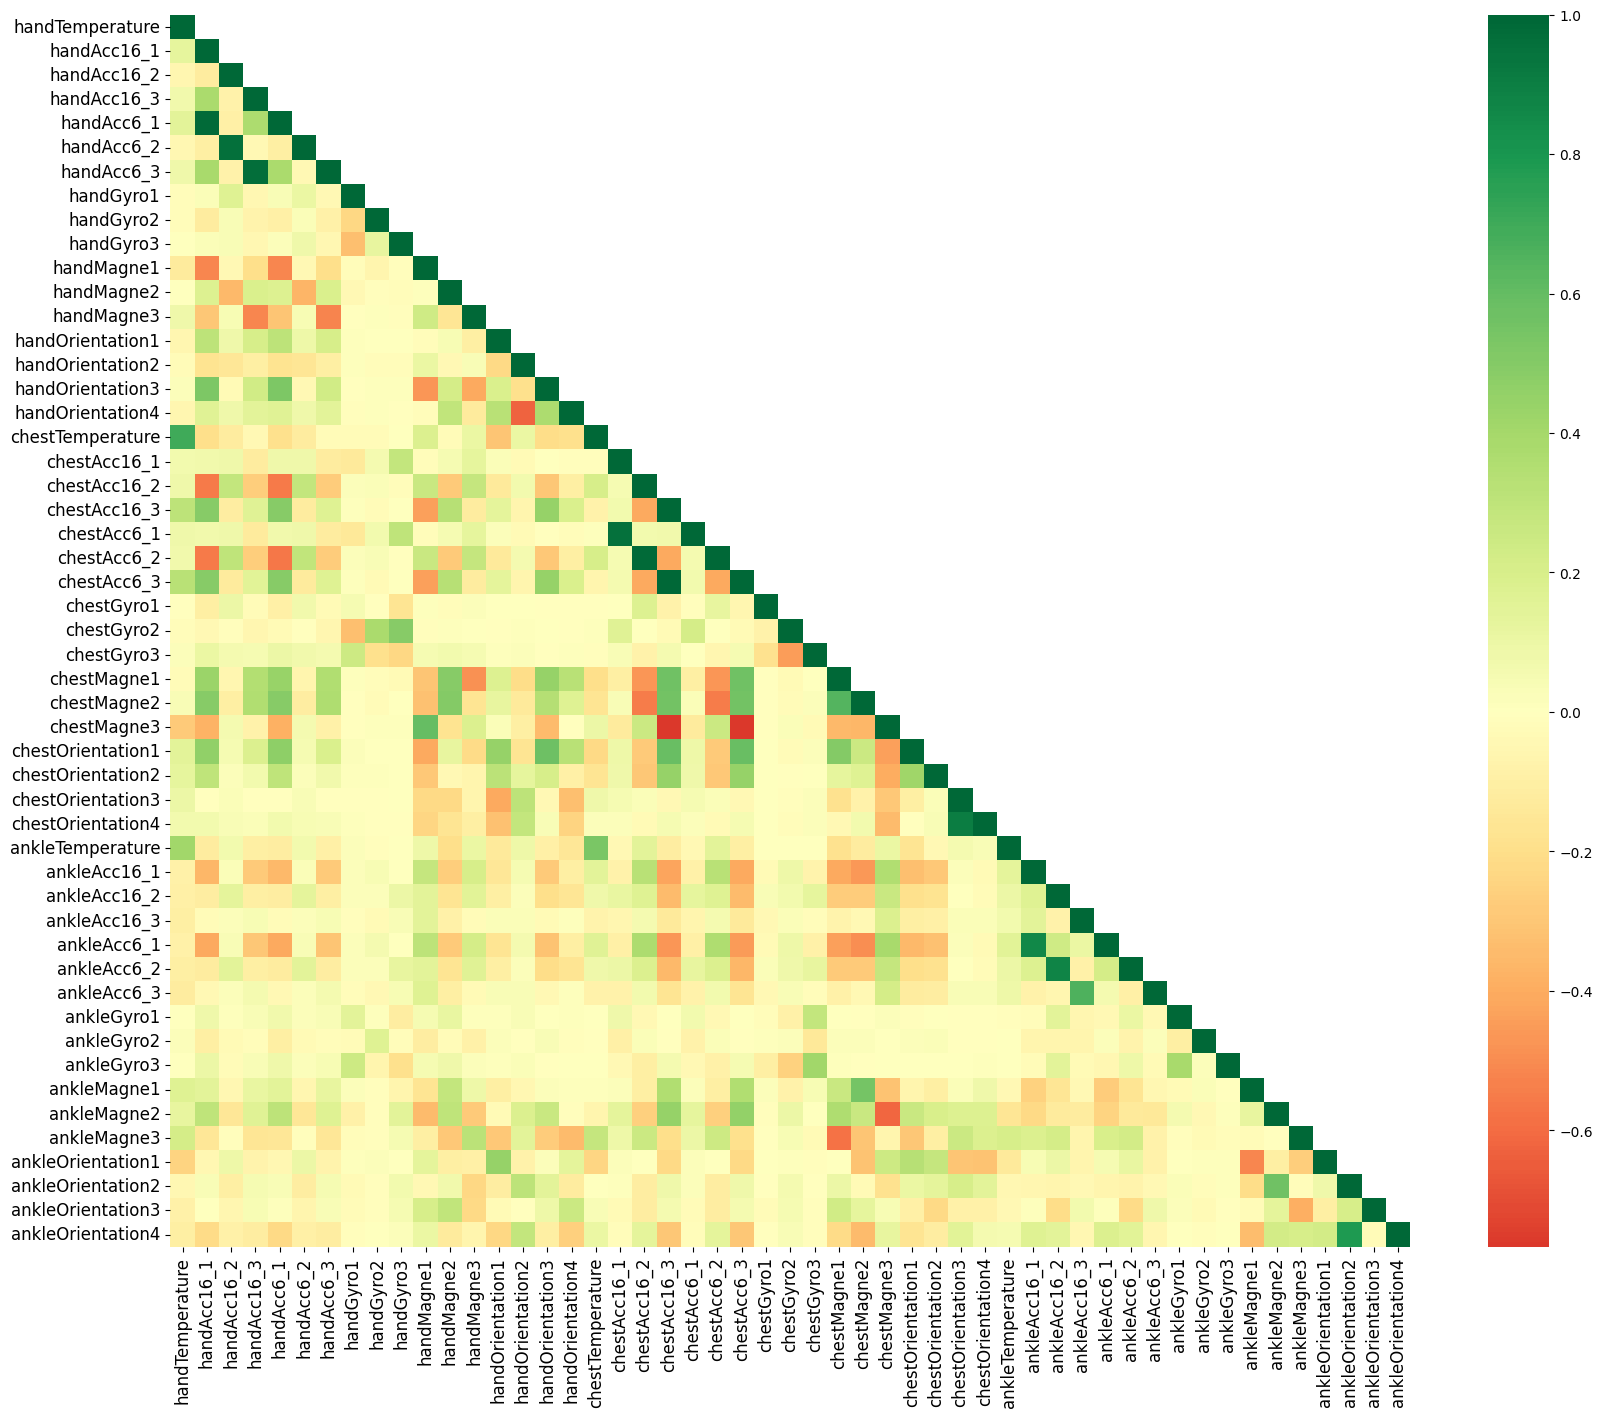

In [324]:
plt.figure(figsize=(20,16))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)
sns.heatmap(corr_matrix, mask=mask, cmap='RdYlGn', center=0,
            annot=False, xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [325]:
corr_hard = []

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j]) > 0.8:
      colname = corr_matrix.columns[i]
      corr_hard.append((colname, i))

corr_hard

[('handAcc6_1', 4),
 ('handAcc6_2', 5),
 ('handAcc6_3', 6),
 ('chestAcc6_1', 21),
 ('chestAcc6_2', 22),
 ('chestAcc6_3', 23),
 ('chestOrientation4', 33),
 ('ankleAcc6_1', 38),
 ('ankleAcc6_2', 39)]

[('handAcc6_1', 5), c handAcc16_1

 ('handAcc6_2', 6), c handAcc16_2

 ('handAcc6_3', 7), c handAcc16_3

 ('chestAcc6_1', 22), c chestAcc6_1

 ('chestAcc6_2', 23), c chestAcc6_2

 ('chestAcc6_3', 24), c chestAcc6_3

 ('chestOrientation4', 34), c chestOrientation3

 ('ankleAcc6_1', 39), c ankleAcc16_1

 ('ankleAcc6_2', 40)] c ankleAcc16_2

In [326]:
df['handAcc6'] = df[['handAcc6_1', 'handAcc6_2', 'handAcc6_3']].mean(axis=1)
df.drop(columns = ['handAcc6_1', 'handAcc6_2', 'handAcc6_3'], inplace = True)
df.drop(columns = ['handAcc16_1', 'handAcc16_2', 'handAcc16_3'], inplace = True)


df['chestAcc6'] = df[['chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3']].mean(axis=1)
df.drop(columns = ['chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3'], inplace = True)
df.drop(columns = ['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3'], inplace = True)

df.drop(columns = ['chestOrientation3'], inplace = True)

df['ankleAcc6_12'] = df[['ankleAcc6_1', 'ankleAcc6_2']].mean(axis=1)
df.drop(columns = ['ankleAcc6_1', 'ankleAcc6_2'], inplace = True)
df.drop(columns = ['ankleAcc16_1', 'ankleAcc16_2'], inplace = True)

df

,handTemperature,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3,handOrientation1,handOrientation2,handOrientation3,...,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,handAcc6,chestAcc6,ankleAcc6_12
0,1.381192,-0.011292,-0.026636,-0.000474,-1.269364,0.798458,-0.427672,-0.189569,-0.602550,1.444584,...,0.736204,1.133232,-1.144190,-0.510345,0.785315,1.335241,-0.707280,0.637075,0.033742,-1.246705
1,-1.539293,0.107667,-0.436724,-0.007983,0.837810,0.416227,-0.734338,0.899942,-0.777243,-0.150612,...,-0.210808,-0.803820,-0.895564,0.724217,-0.850270,0.297357,-0.536016,0.155736,-1.163444,0.200294
2,1.096267,0.024983,0.014445,-0.007128,-0.548356,1.579104,0.582567,-0.277761,1.589488,1.482866,...,0.514880,0.637810,0.590226,-0.731554,1.372327,0.262233,1.673075,-0.778709,0.144568,0.278030
3,-0.292744,1.486480,-0.085553,-1.131511,1.089513,0.114914,0.620865,0.101704,1.523978,-0.582640,...,0.104356,1.448828,0.368788,0.186367,1.563247,0.008560,1.112837,-0.603005,0.034474,0.897223
4,0.597648,0.001650,-0.039041,-0.020226,-0.685759,-0.546664,0.249754,0.509105,-1.228839,1.042213,...,0.568616,-0.274735,-0.208200,-0.627466,-1.174920,-0.146771,-0.889897,0.521729,0.229023,0.087216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.811342,-0.128051,0.804232,2.702926,0.009979,-0.834856,-0.047240,-0.303496,-1.400842,0.313287,...,0.194074,-1.153604,0.496550,-0.139379,-1.091934,0.732741,-0.295731,-0.102618,0.534829,1.406166
534597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.359830,1.334021,0.094846,0.251376,1.343826,0.197949,1.413339,NaN,0.745983,0.182614
534598,1.274345,0.185501,-0.418864,1.214602,0.560363,-1.210681,-1.004586,-2.016059,1.757308,-0.406538,...,-1.084545,0.830816,-0.873448,0.668848,0.695478,1.316552,0.698566,-0.281112,-0.204266,0.051717
534599,-2.500916,3.062433,2.943901,0.054373,0.766978,-0.933943,1.965400,0.948715,-0.098014,0.967467,...,-0.279675,-0.592915,1.396856,-0.989188,-1.264948,-1.046225,-0.904926,-0.183815,2.494858,1.379877


Пропуски

In [327]:
data_null = pd.DataFrame()
data_null['na'] = df.isnull().sum() / len(df) * 100
data_null = data_null.sort_values(by = 'na', ascending = False)
data_null['na'].value_counts()

,count
na,
0.476243,14
0.755891,12
0.151328,11


In [328]:
data_null_75 = data_null[data_null['na'] > 0.75]
arr_null_75 = np.array(data_null_75.index)
arr_null_75

array(['handTemperature', 'handOrientation1', 'handGyro1',
       'handOrientation4', 'handOrientation3', 'handOrientation2',
       'handAcc6', 'handMagne3', 'handMagne2', 'handMagne1', 'handGyro3',
       'handGyro2'], dtype=object)

In [329]:
data_null_45 = data_null[data_null['na'] > 0.45]
data_null_45 = data_null_45[data_null_45['na'] < 0.75]
data_null_45.index

Index(['ankleAcc6_3', 'ankleOrientation4', 'ankleOrientation3',
       'ankleOrientation2', 'ankleOrientation1', 'ankleMagne3', 'ankleMagne2',
       'ankleMagne1', 'ankleGyro3', 'ankleGyro2', 'ankleGyro1', 'ankleAcc6_12',
       'ankleAcc16_3', 'ankleTemperature'],
      dtype='object')

In [330]:
data_null_15 = data_null[data_null['na'] > 0.15]
data_null_15 = data_null_15[data_null_15['na'] < 0.45]
data_null_15.index

Index(['chestOrientation4', 'chestOrientation2', 'chestMagne3', 'chestMagne2',
       'chestMagne1', 'chestGyro3', 'chestGyro2', 'chestGyro1',
       'chestTemperature', 'chestAcc6', 'chestOrientation1'],
      dtype='object')

In [331]:
data_null_00 = data_null[data_null['na'] < 0.01]
data_null_00.index

Index([], dtype='object')

Заполнение пропусков

In [332]:
df = df. interpolate()
df.isna().sum()

,0
handTemperature,0
handGyro1,0
handGyro2,0
handGyro3,0
handMagne1,0
handMagne2,0
handMagne3,0
handOrientation1,0
handOrientation2,0
handOrientation3,0


Сокращаем колво признаков (колонок)

In [333]:
from sklearn.decomposition import PCA

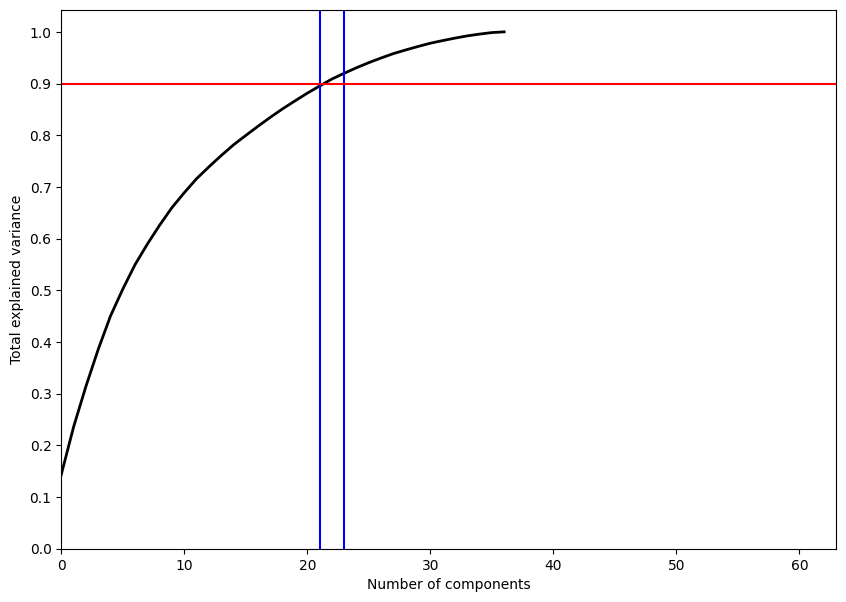

In [334]:
# подбор оптимального колва параметров
pca = PCA(). fit(df)
plt. figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt. xlabel('Number of components')
plt.ylabel( 'Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axvline(21, c='b')
plt.axvline(23, c='b')


plt.axhline(0.9, c='r')
plt. show()

In [335]:
pca = PCA(n_components=21)

principalComponents = pca. fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents)

evr = pca.explained_variance_ratio_
evr.sum()
# % данных который остался от исходных

0.8813881136215621

kmeans

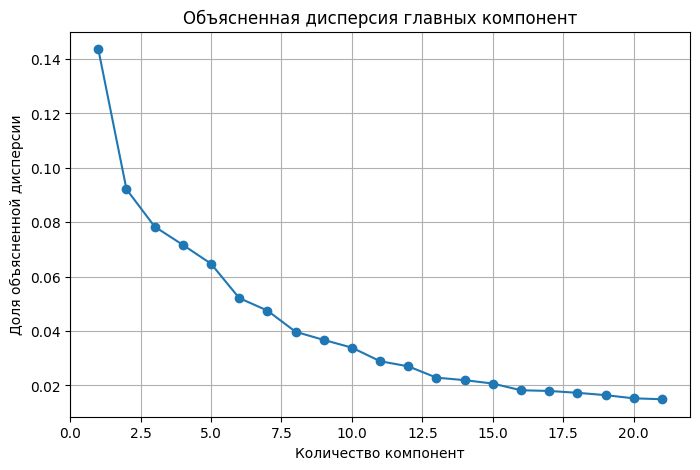

In [336]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Объясненная дисперсия главных компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Доля объясненной дисперсии')
plt.grid()
plt.show()

In [337]:
from sklearn.cluster import KMeans

n_init = 12
max_iter = 225
tol = 0.0001
random_state = 123
n_clusters = 5


clusterer = KMeans(n_clusters=n_clusters, max_iter = max_iter,
random_state = random_state)
cluster_labels = clusterer. fit_predict(principalComponents)
# inertia
inertia = clusterer. inertia_

In [338]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()
predictions

,index,activityID
0,0,2
1,1,0
2,2,1
3,3,1
4,4,3
...,...,...
534596,534596,0
534597,534597,1
534598,534598,1
534599,534599,3


In [339]:
predictions['activityID'].unique()

array([2, 0, 1, 3, 4], dtype=int32)

In [340]:
replacements = {}
k = 0
for i in predictions['activityID'].unique():
  replacements[i] = k
  k+=1

In [341]:
replacements

{2: 0, 0: 1, 1: 2, 3: 3, 4: 4}

In [342]:
predictions['activityID'] = predictions['activityID'].replace(replacements)

In [343]:
predictions['activityID'].unique()

array([0, 1, 2, 3, 4], dtype=int32)

In [344]:
predictions.to_csv('./my_submission.csv', index = False)